# Loading the Libraries and Data

In [1]:
import pandas as pd


# Load Dataset

In [11]:
url = 'https://raw.githubusercontent.com/divaamahajan/K-Most-Popular-Words/main/logs/logs.csv'
df = pd.read_csv(url)
df.head()

,Top k,Data Structure,File division,Algorithm Approach,Filename,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,5.00,4.38,121.88,1.2
1,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,10.00,4.69,188.07,3.6
2,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,20.00,4.52,225.91,1.3
3,10,counter,chunks,multithread,small_50MB_dataset.txt,0.04,40.00,4.53,234.38,1.1
4,10,counter,chunks,singlethread,small_50MB_dataset.txt,0.04,5.73,4.07,54.63,1.3


# Data Preprocessing

In [13]:
import numpy as np

# Replace "chunks heapq" with "chunks" in the File division column
df.loc[df['File division'] == 'chunks heapq', 'File division'] = 'chunks'

# Concatenate "heapq" to the current value of Data Structure column
df.loc[df['File division'] == 'chunks', 'Data Structure'] += ' heapq'

# check if Algorithm Approach column = 'chunks heapq'
mask = df['Algorithm Approach'] == 'chunks heapq'

# update the Data Structure column for matching rows
df.loc[mask, 'Data Structure'] = df.loc[mask, 'Data Structure'].astype(str) + ' heapq'

# replace 'chunks heapq' with 'singlethread' in the Algorithm Approach column
df.loc[mask, 'Algorithm Approach'] = 'singlethread'



In [14]:
df

,Top k,Data Structure,File division,Algorithm Approach,Filename,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,10,counter heapq,chunks,multithread,small_50MB_dataset.txt,0.04,5.00,4.38,121.88,1.2
1,10,counter heapq,chunks,multithread,small_50MB_dataset.txt,0.04,10.00,4.69,188.07,3.6
2,10,counter heapq,chunks,multithread,small_50MB_dataset.txt,0.04,20.00,4.52,225.91,1.3
3,10,counter heapq,chunks,multithread,small_50MB_dataset.txt,0.04,40.00,4.53,234.38,1.1
4,10,counter heapq,chunks,singlethread,small_50MB_dataset.txt,0.04,5.73,4.07,54.63,1.3
...,...,...,...,...,...,...,...,...,...,...
76,5,counter heapq,chunks,singlethread,data_2.5GB.txt,2.31,20.00,90.34,889.84,3.0
77,5,counter heapq,chunks,singlethread,data_2.5GB.txt,2.31,40.00,90.18,1079.88,1.5
78,5,hashmap,file,singlethread,data_300MB.txt,0.29,NaN,9.25,29.67,2.0
79,5,hashmap,file,singlethread,data_2.5GB.txt,2.31,NaN,80.58,170.31,1.9


In [15]:
df.describe()

,Top k,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
count,81.000000,81.000000,76.000000,81.000000,81.000000,81.000000
mean,6.296296,2.616543,45.362632,42.191605,677.363704,5.223457
std,2.204793,4.764745,117.626162,77.801692,626.406075,9.436091
min,5.000000,0.040000,2.290000,0.010000,15.020000,0.000000
25%,5.000000,0.040000,5.730000,1.970000,137.950000,1.700000
50%,5.000000,0.290000,20.000000,9.250000,542.480000,2.500000
75%,10.000000,2.310000,40.000000,80.580000,991.030000,4.200000
max,10.000000,14.340000,734.090000,510.100000,2497.410000,66.700000


In [16]:
# drop 'Top k' and 'Filename' columns
df = df.drop(columns=['Top k', 'Filename'])

# convert 'Data Structure', 'File division', and 'Algorithm Approach' to numeric values
df['Data Structure'] = df['Data Structure'].astype('category').cat.codes
df['File division'] = df['File division'].astype('category').cat.codes
df['Algorithm Approach'] = df['Algorithm Approach'].astype('category').cat.codes

# create dictionaries to map numeric codes to text values
data_structure_dict = {code: value for code, value in enumerate(df['Data Structure'].astype('category').cat.categories)}
file_division_dict = {code: value for code, value in enumerate(df['File division'].astype('category').cat.categories)}
algorithm_approach_dict = {code: value for code, value in enumerate(df['Algorithm Approach'].astype('category').cat.categories)}

# identify rows where chunk size is 0
mask = df['Chunk Size (MB)'] == 0

# convert file size to MB for matching rows
converted_values = df.loc[mask, 'File Size (GB)'] * 1024

# update the DataFrame
df.loc[mask, 'Chunk Size (MB)'] = converted_values.round(2)

df.head()

,Data Structure,File division,Algorithm Approach,File Size (GB),Chunk Size (MB),Running time (seconds),Memory usage (MB),CPU utilization %
0,1,0,2,0.04,5.00,4.38,121.88,1.2
1,1,0,2,0.04,10.00,4.69,188.07,3.6
2,1,0,2,0.04,20.00,4.52,225.91,1.3
3,1,0,2,0.04,40.00,4.53,234.38,1.1
4,1,0,3,0.04,5.73,4.07,54.63,1.3


# Correltion Analysis

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()
corr_matrix

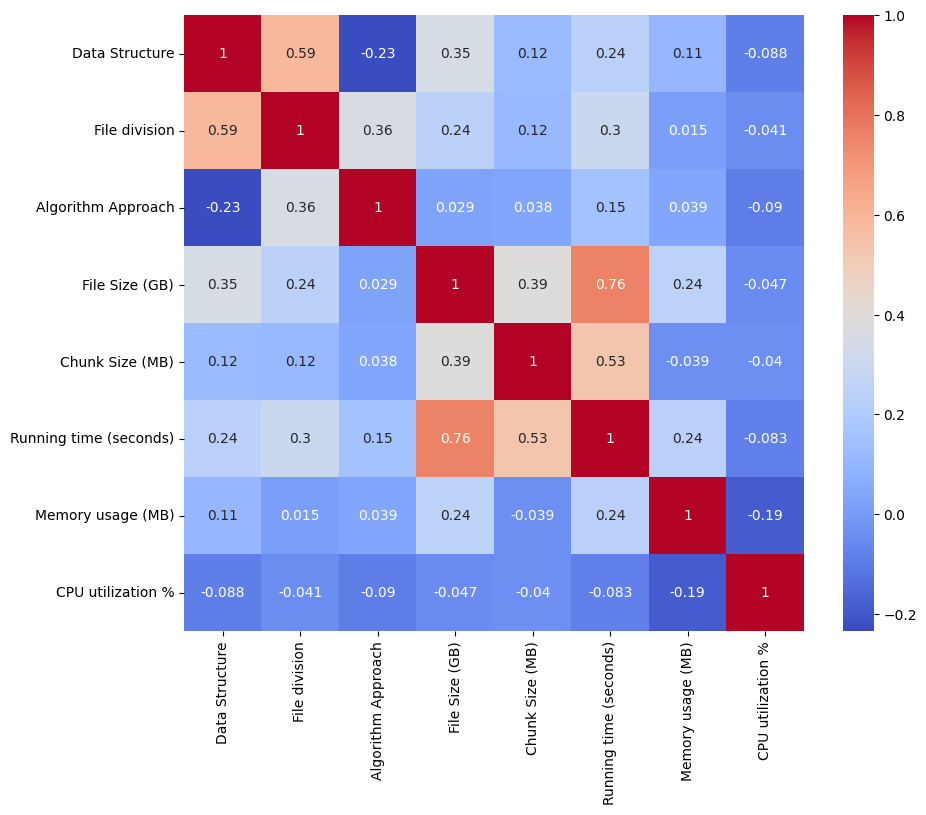

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


* File Size (GB) and Running time (seconds) have a strong positive correlation of 0.76, meaning that as the file size increases, the running time tends to increase as well.
* Memory usage (MB) and CPU utilization % have a strong negative correlation of -0.19, meaning that as memory usage increases, CPU utilization tends to decrease.
* We can see that Memory usage (MB) has a weak positive correlation with File Size (GB) and Running time (seconds), which suggests that as the file size or running time increases, the memory usage may also increase slightly.
* Similarly, CPU utilization % has a weak negative correlation with Algorithm Approach, suggesting that more complex algorithms may result in lower CPU utilization.

# Data Visualization

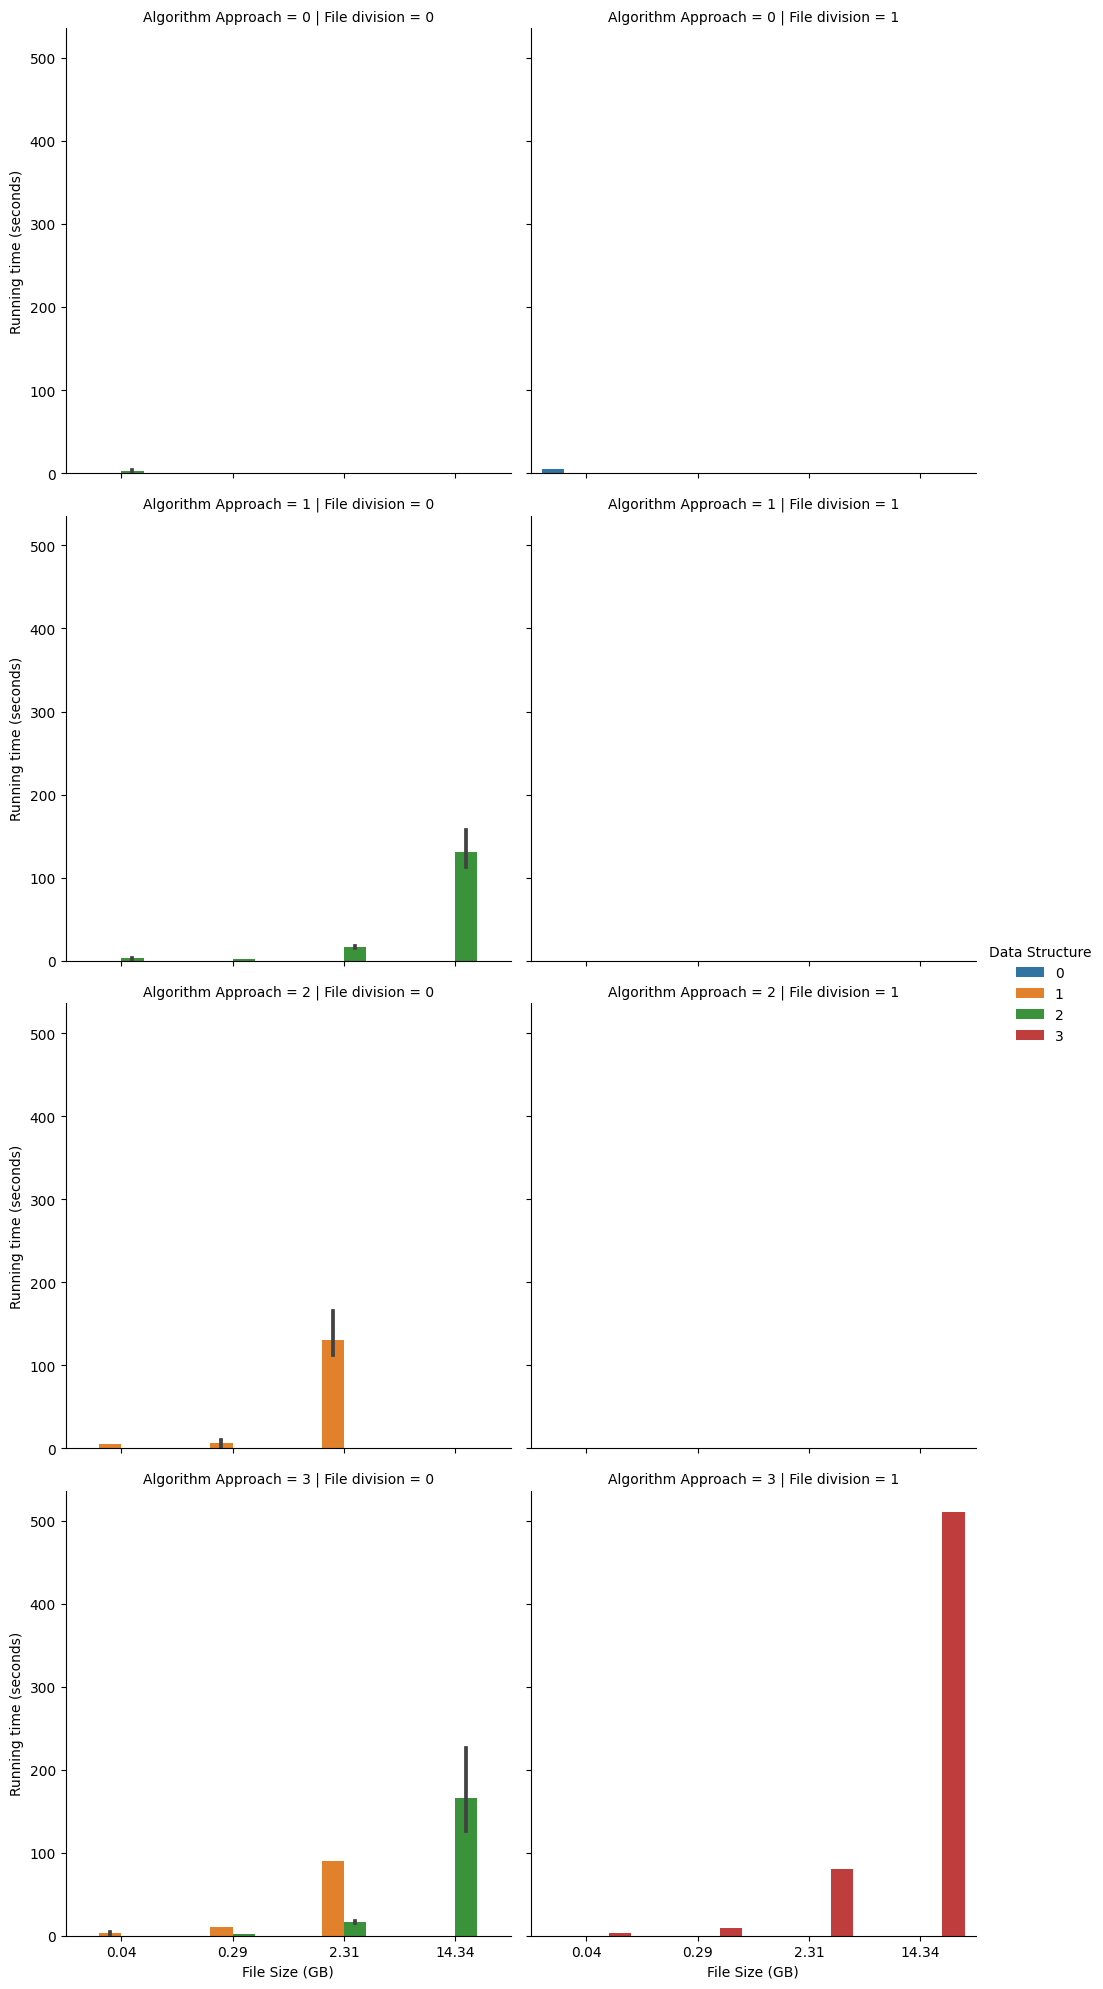

In [18]:
# plot the performance of each data structure for different file sizes
sns.catplot(x="File Size (GB)", y="Running time (seconds)", hue="Data Structure",
            col="File division", row="Algorithm Approach", data=df, kind="bar")
plt.show()

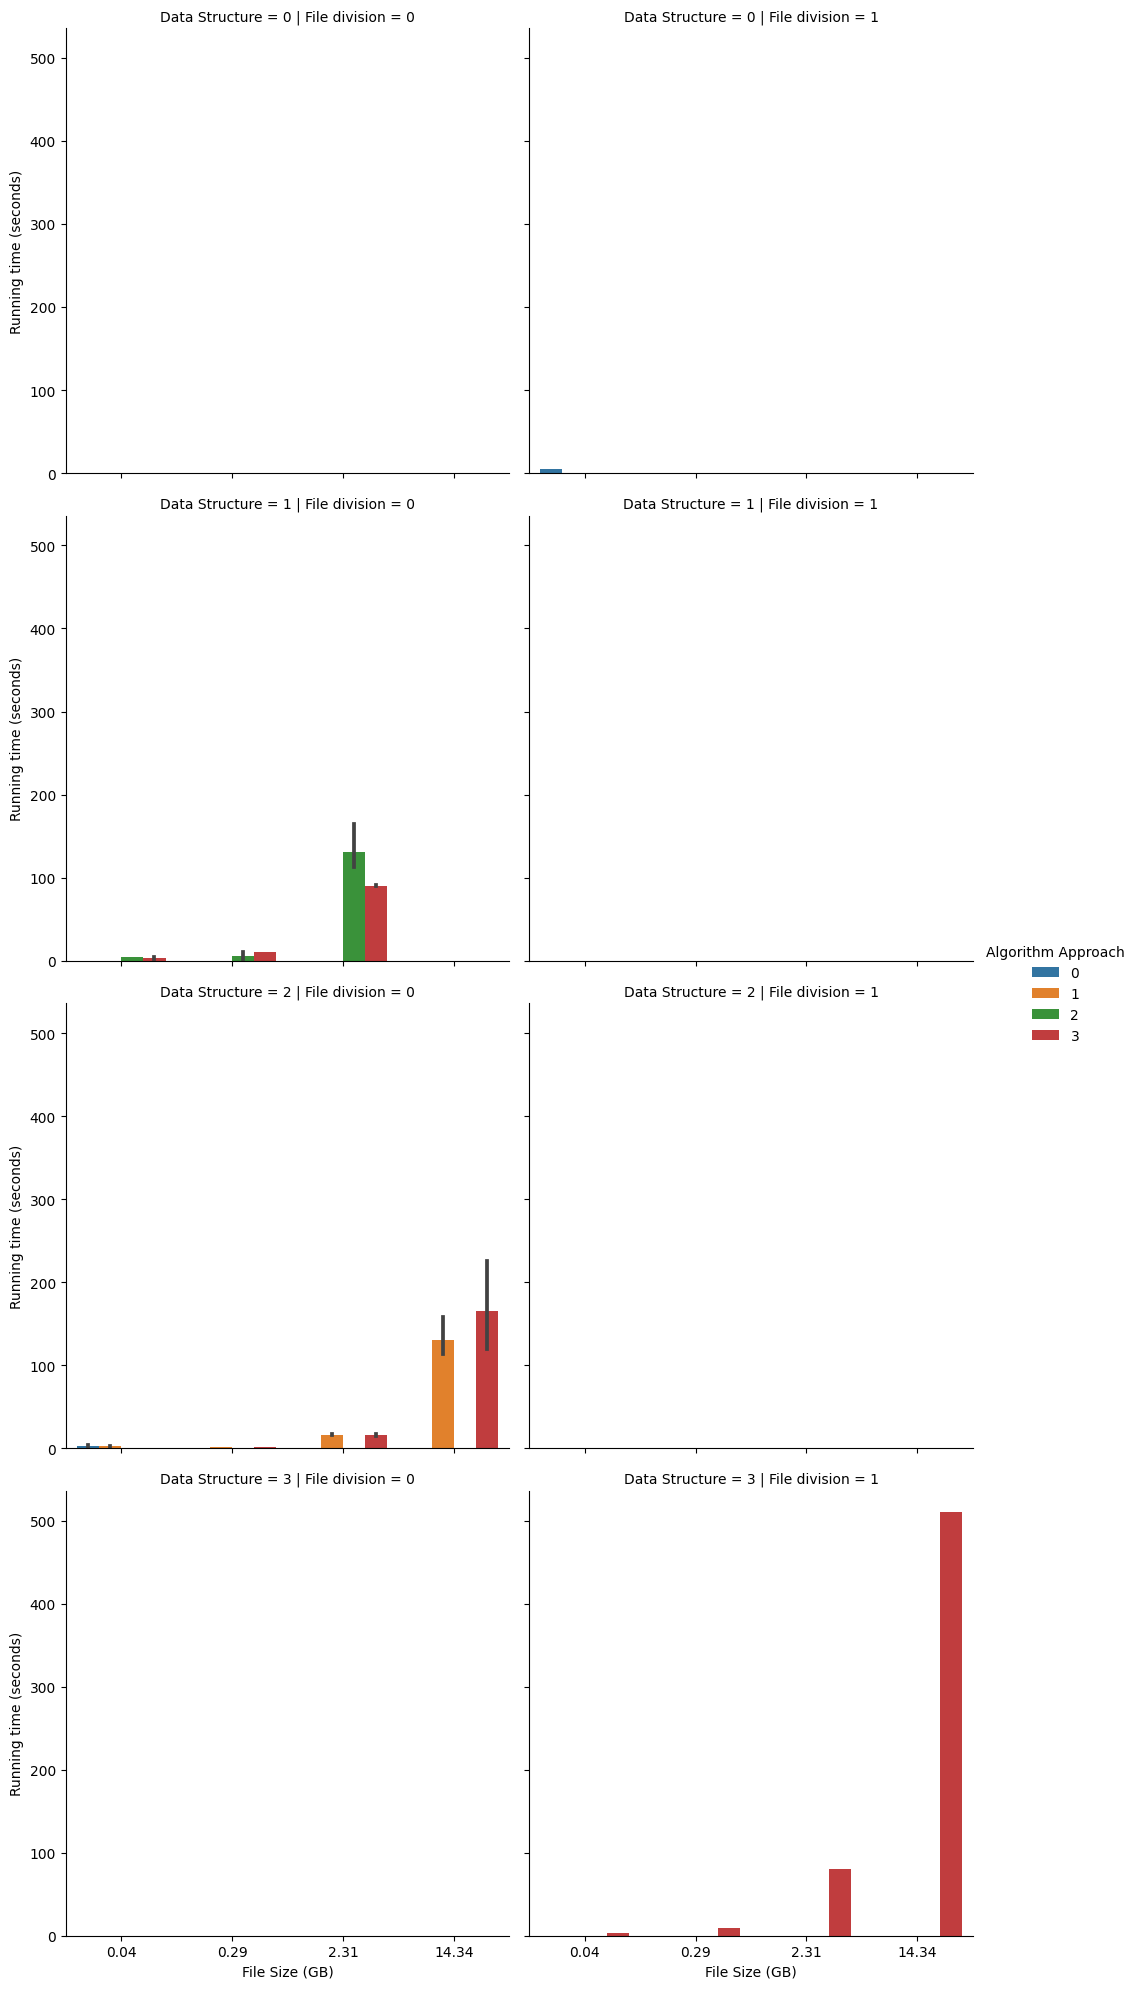

In [20]:
# plot the performance of each algorithm approach for different file sizes
sns.catplot(x="File Size (GB)", y="Running time (seconds)", hue="Algorithm Approach",
            col="File division", row="Data Structure", data=df, kind="bar")
plt.show()

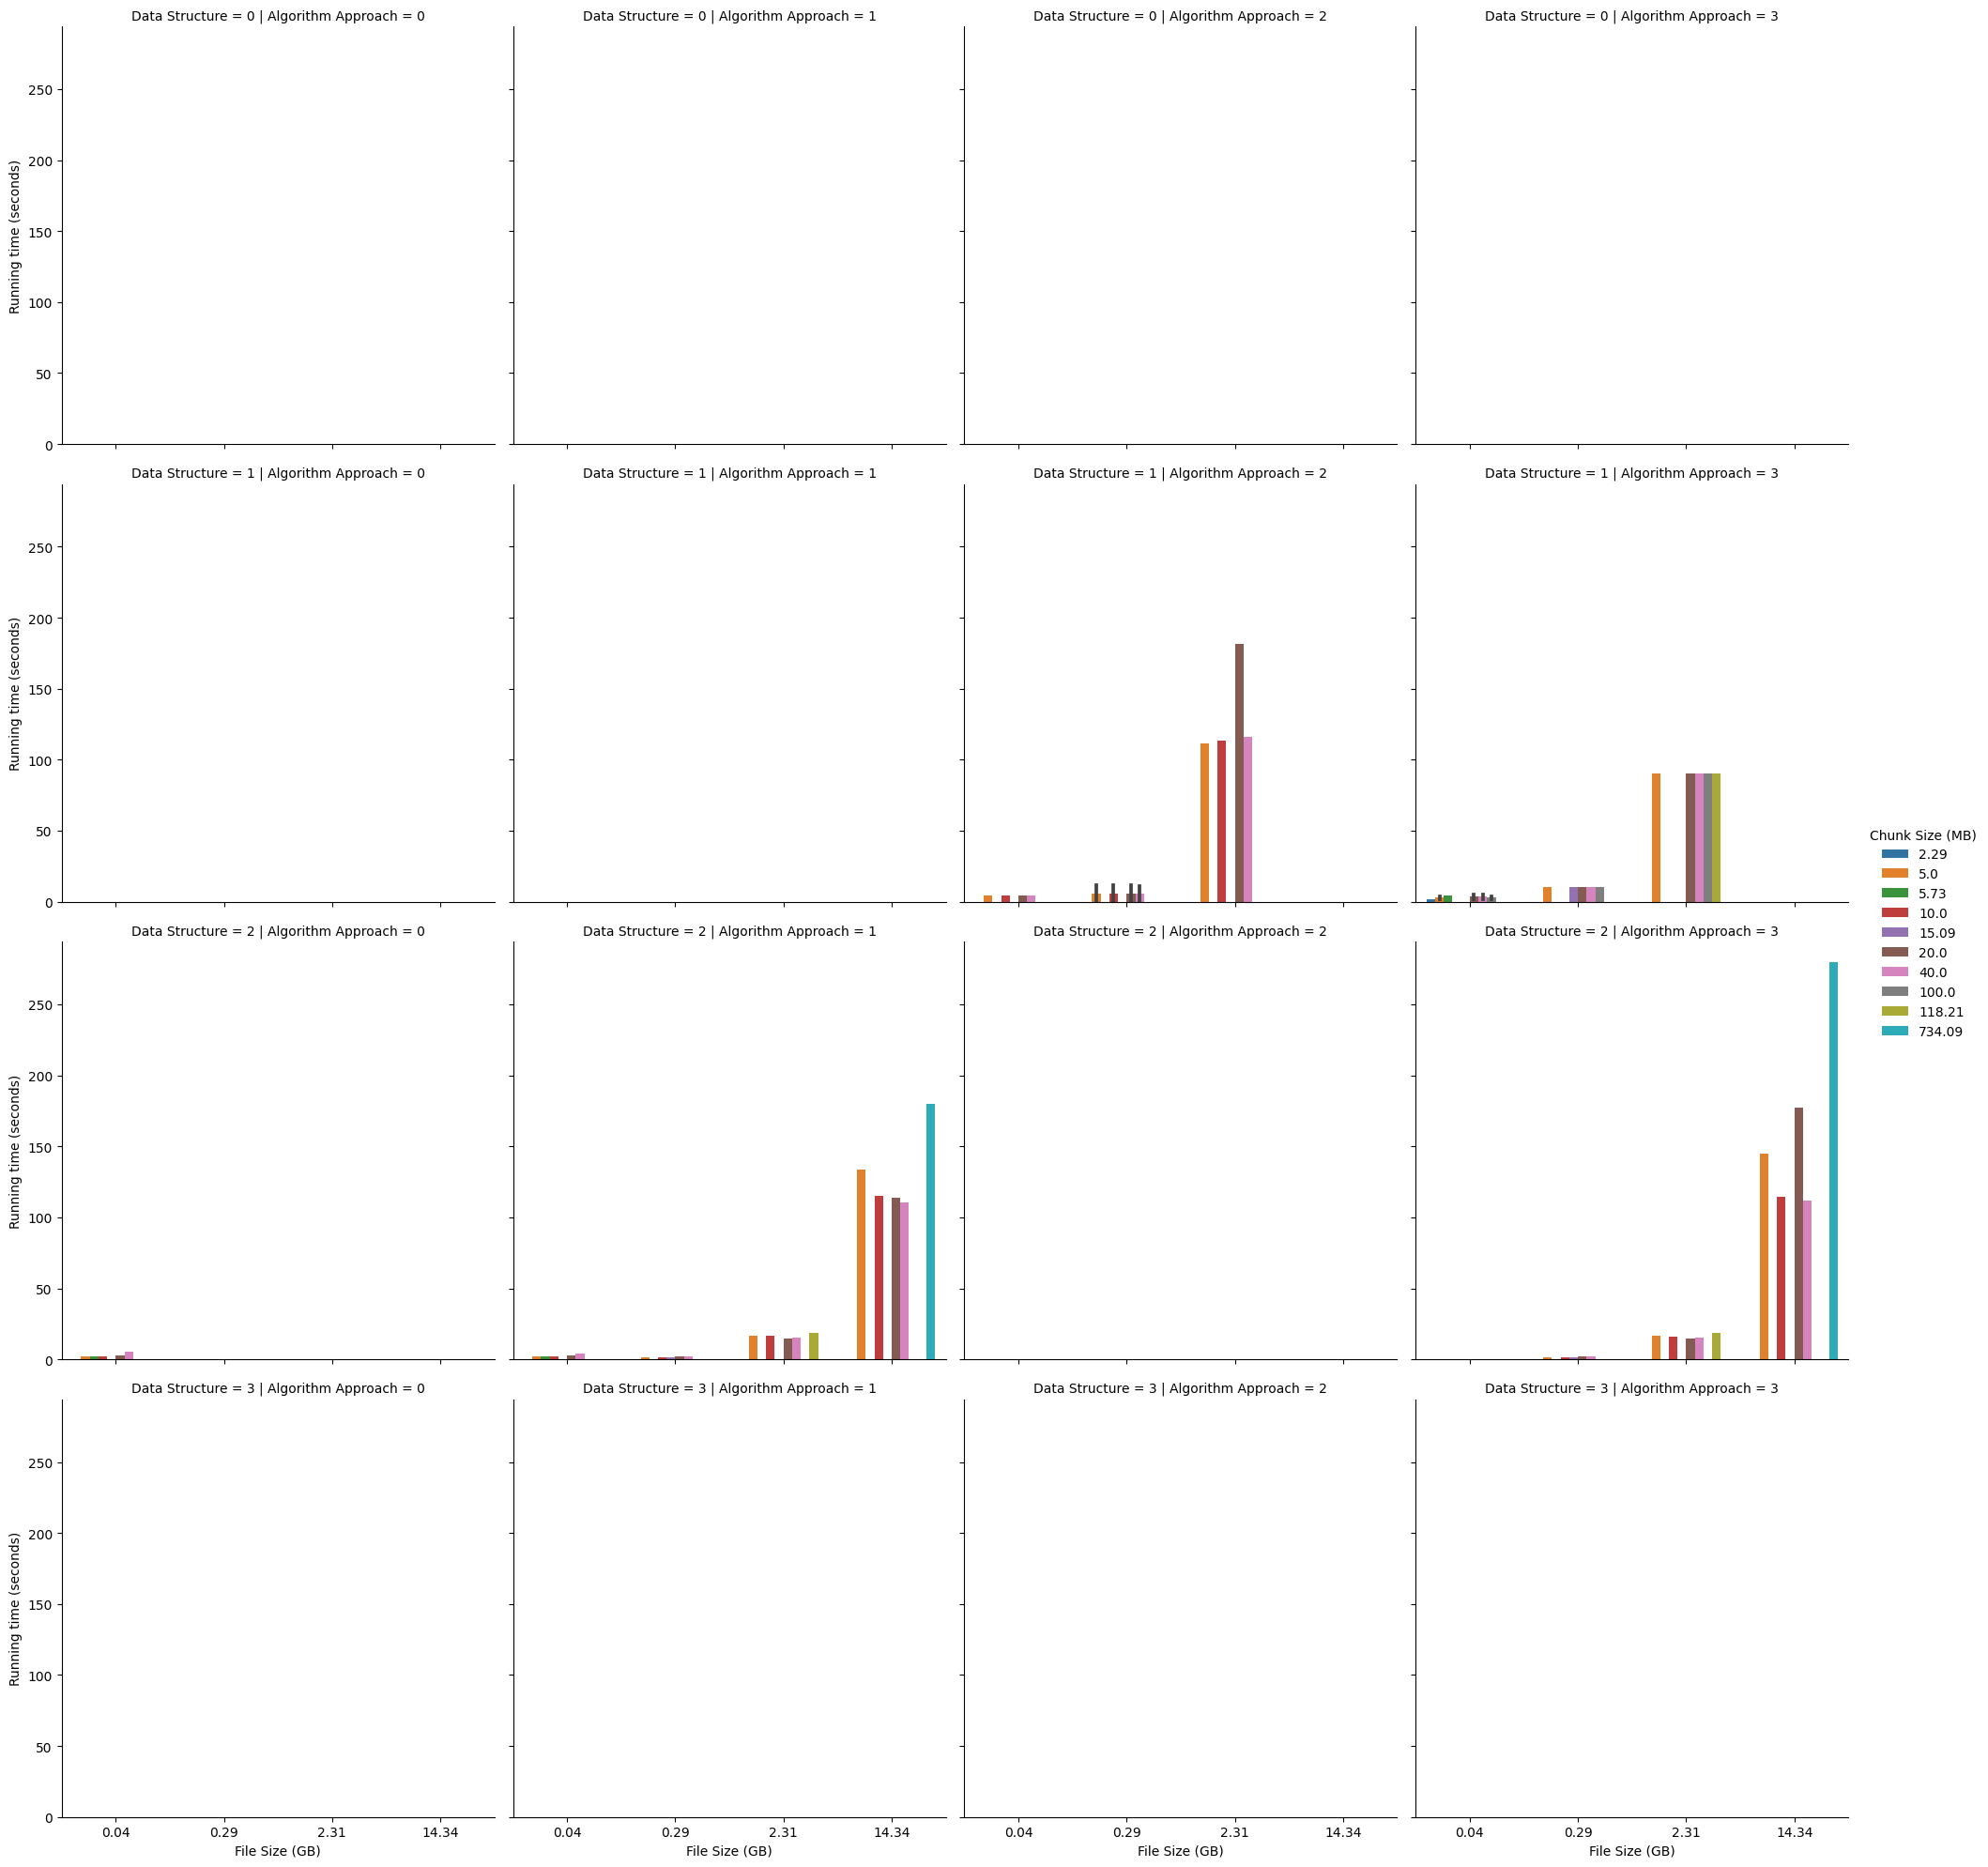

In [23]:
# plot the performance of each chunk size for different file sizes
sns.catplot(x="File Size (GB)", y="Running time (seconds)", hue="Chunk Size (MB)",
            col="Algorithm Approach", row="Data Structure", data=df, kind="bar")

plt.show()

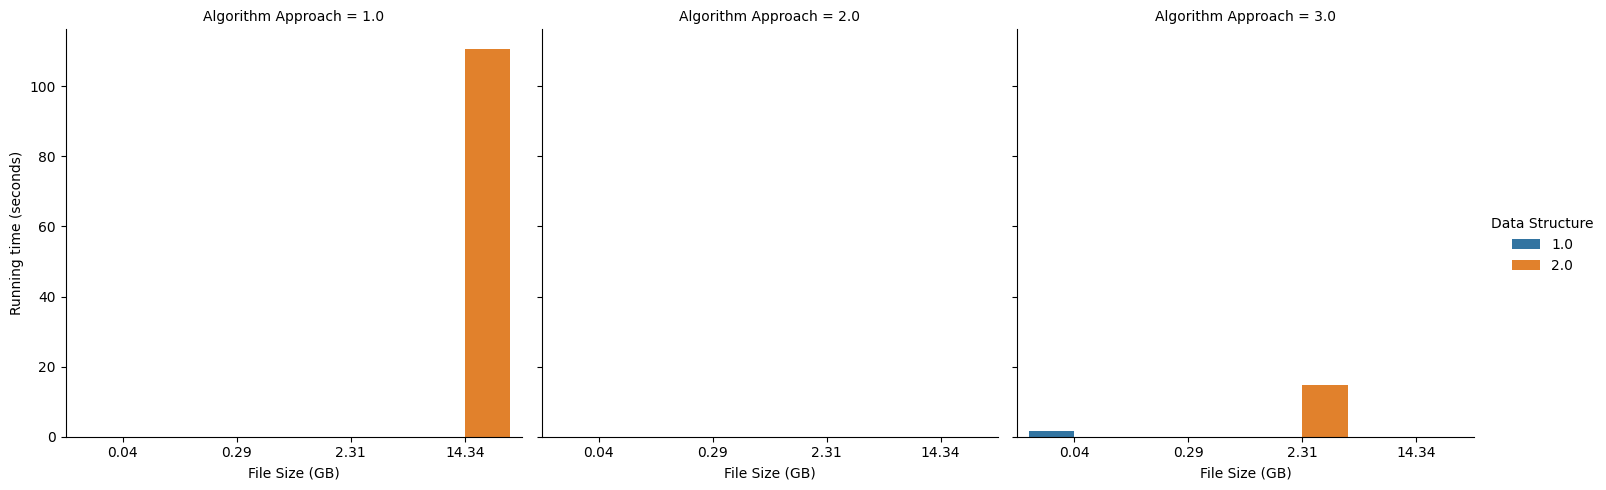

In [21]:
# plot the best performing combination of data structure and algorithm approach for each file size
best_performing = df.groupby(['File Size (GB)']).apply(lambda x: x.loc[x['Running time (seconds)'].idxmin()])
sns.catplot(x="File Size (GB)", y="Running time (seconds)", hue="Data Structure",
            col="Algorithm Approach", data=best_performing, kind="bar")
plt.show()

In [27]:
list(df)

['Data Structure',
 'File division',
 'Algorithm Approach',
 'File Size (GB)',
 'Chunk Size (MB)',
 'Running time (seconds)',
 'Memory usage (MB)',
 'CPU utilization %']

In [ ]:
df.rename(columns={'Chunk Size (MB)': 'Chunk_Size_MB'}, inplace=True)


In [30]:
list(df)

['Data Structure',
 'File division',
 'Algorithm Approach',
 'File Size (GB)',
 'Chunk_Size_MB',
 'Running time (seconds)',
 'Memory usage (MB)',
 'CPU utilization %']

In [37]:
print(type(df.columns[4]))
print(type(df.columns[5]))


<class 'str'>
<class 'str'>


KeyError: 'x'

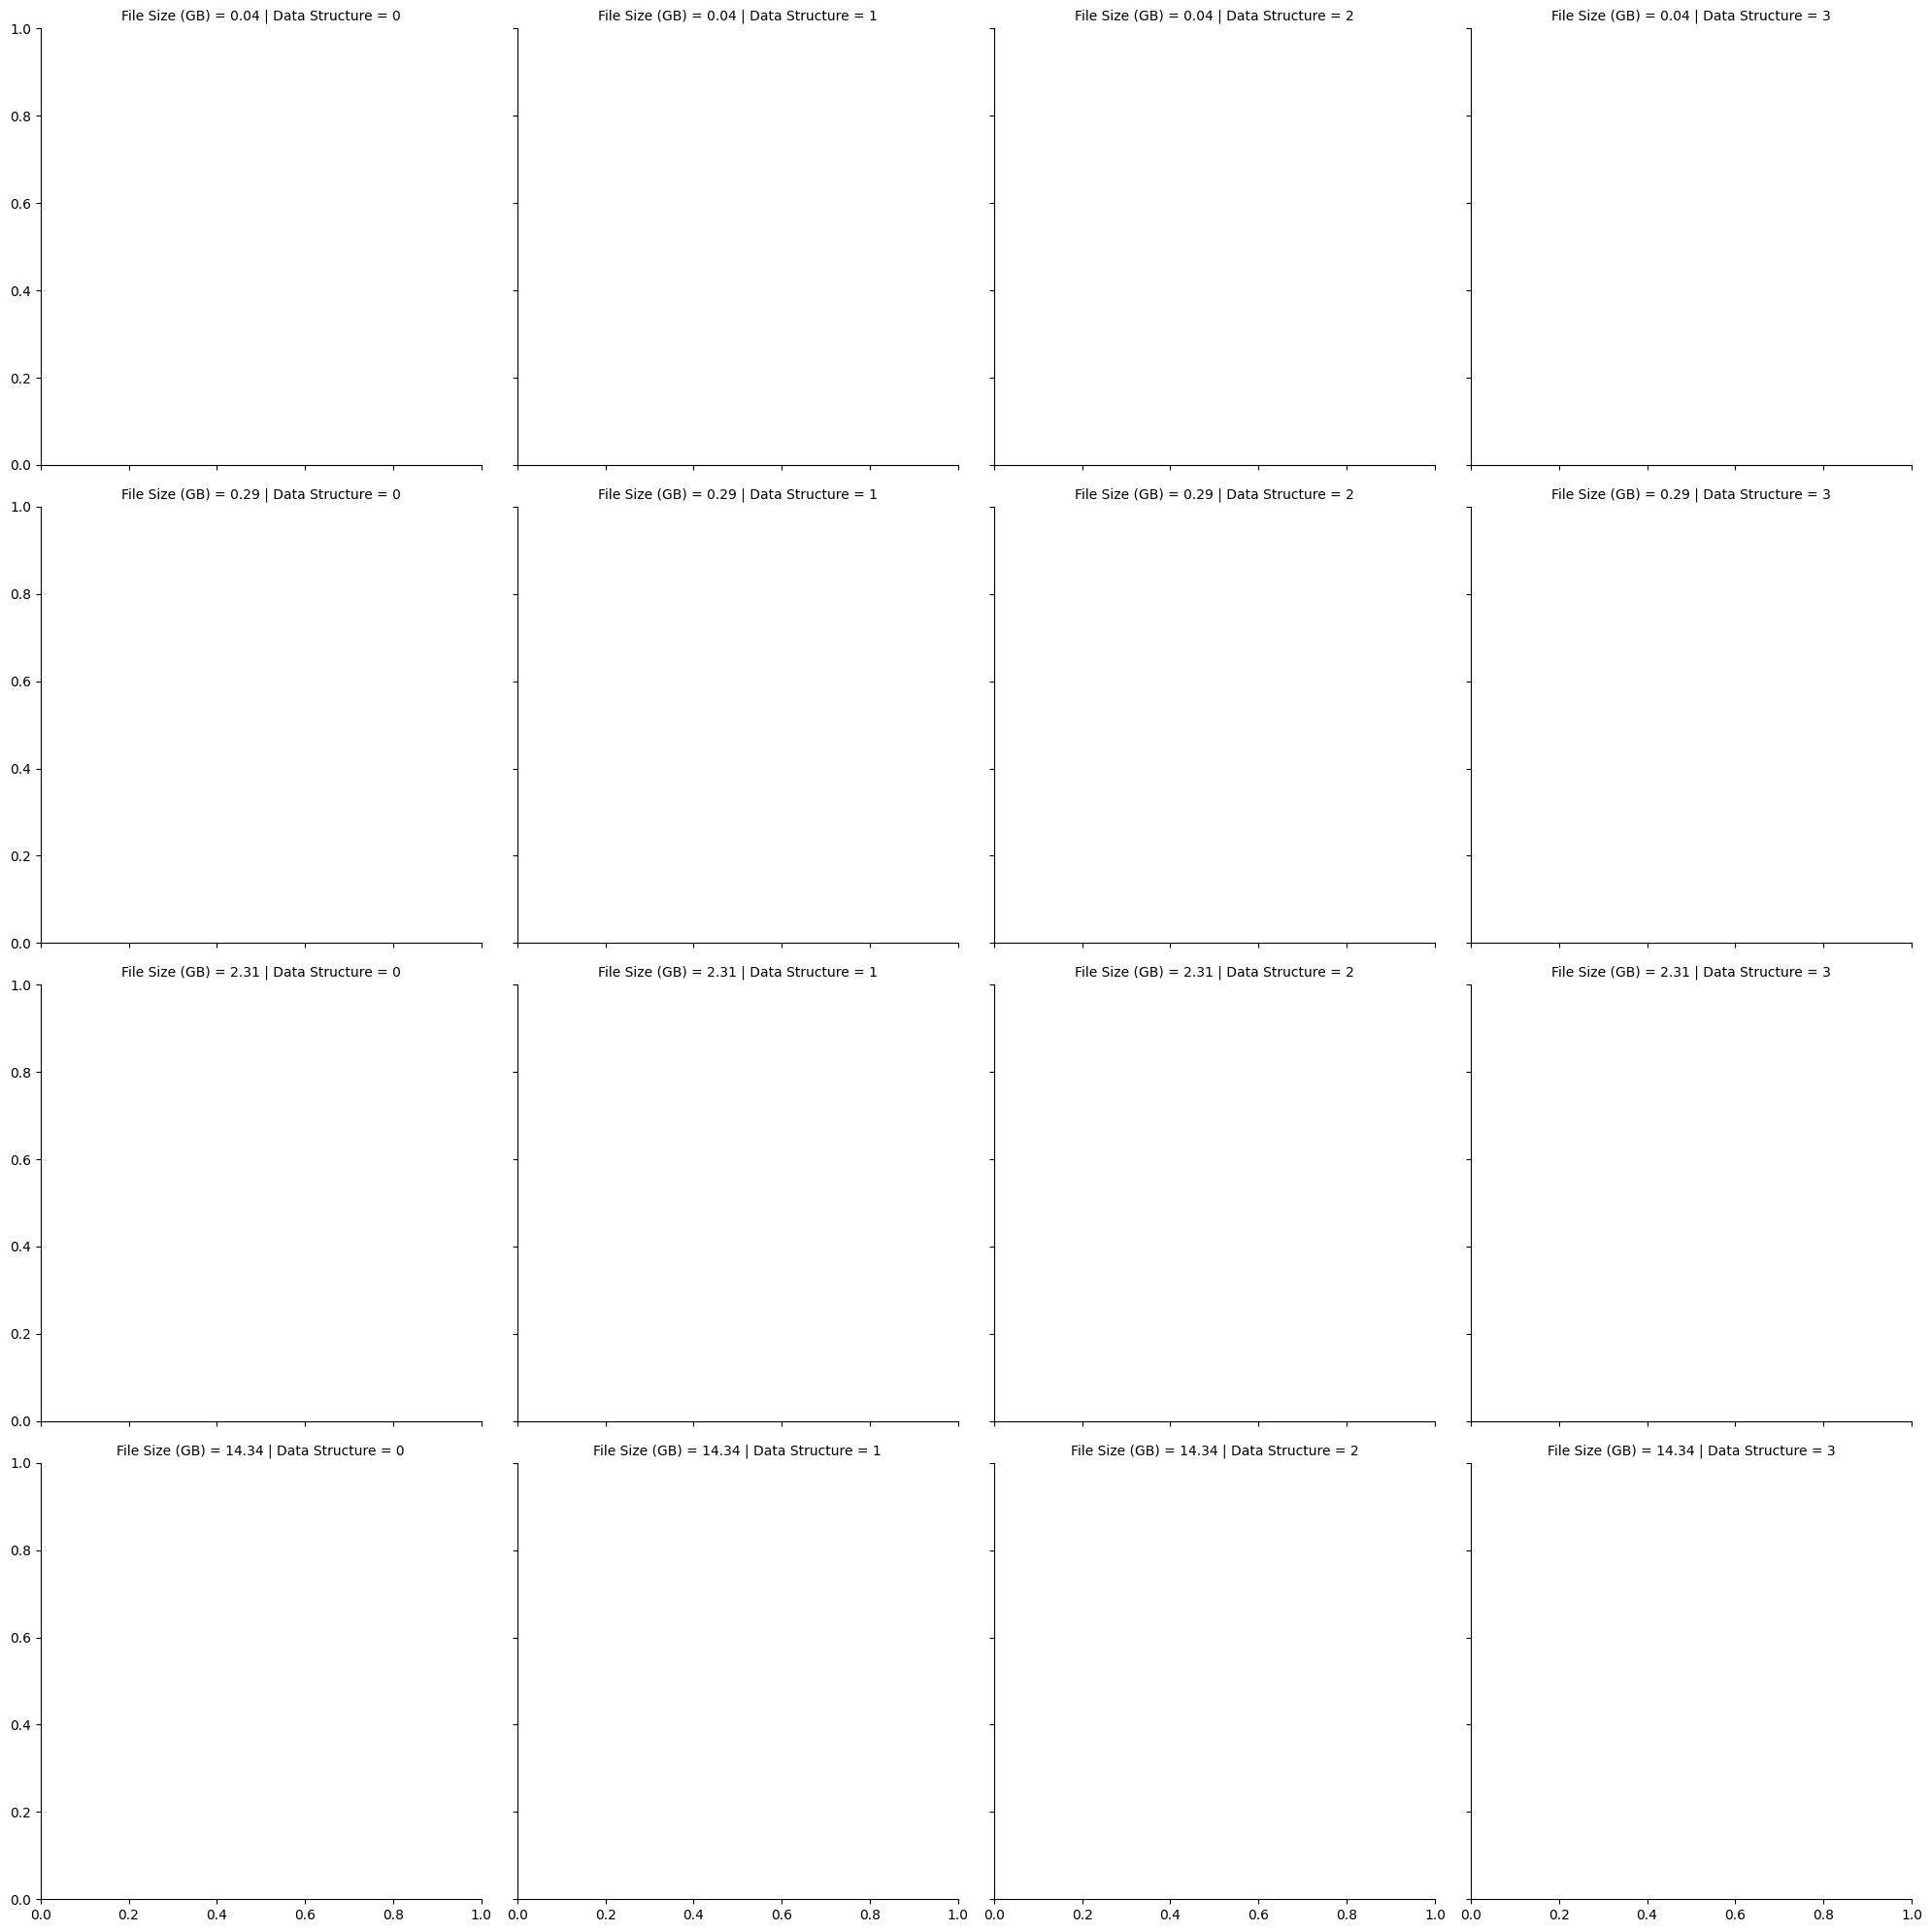

In [39]:
# plot how Running time, Memory usage and CPU utilization change with Algorithm Approach, Data Structure, and Chunk Size
sns.relplot(x="Chunk_Size_MB", y="Running time (seconds)", hue="Algorithm Approach", 
            col="Data Structure", row="File Size (GB)", data=df, kind="line")

plt.show()

KeyError: 'x'

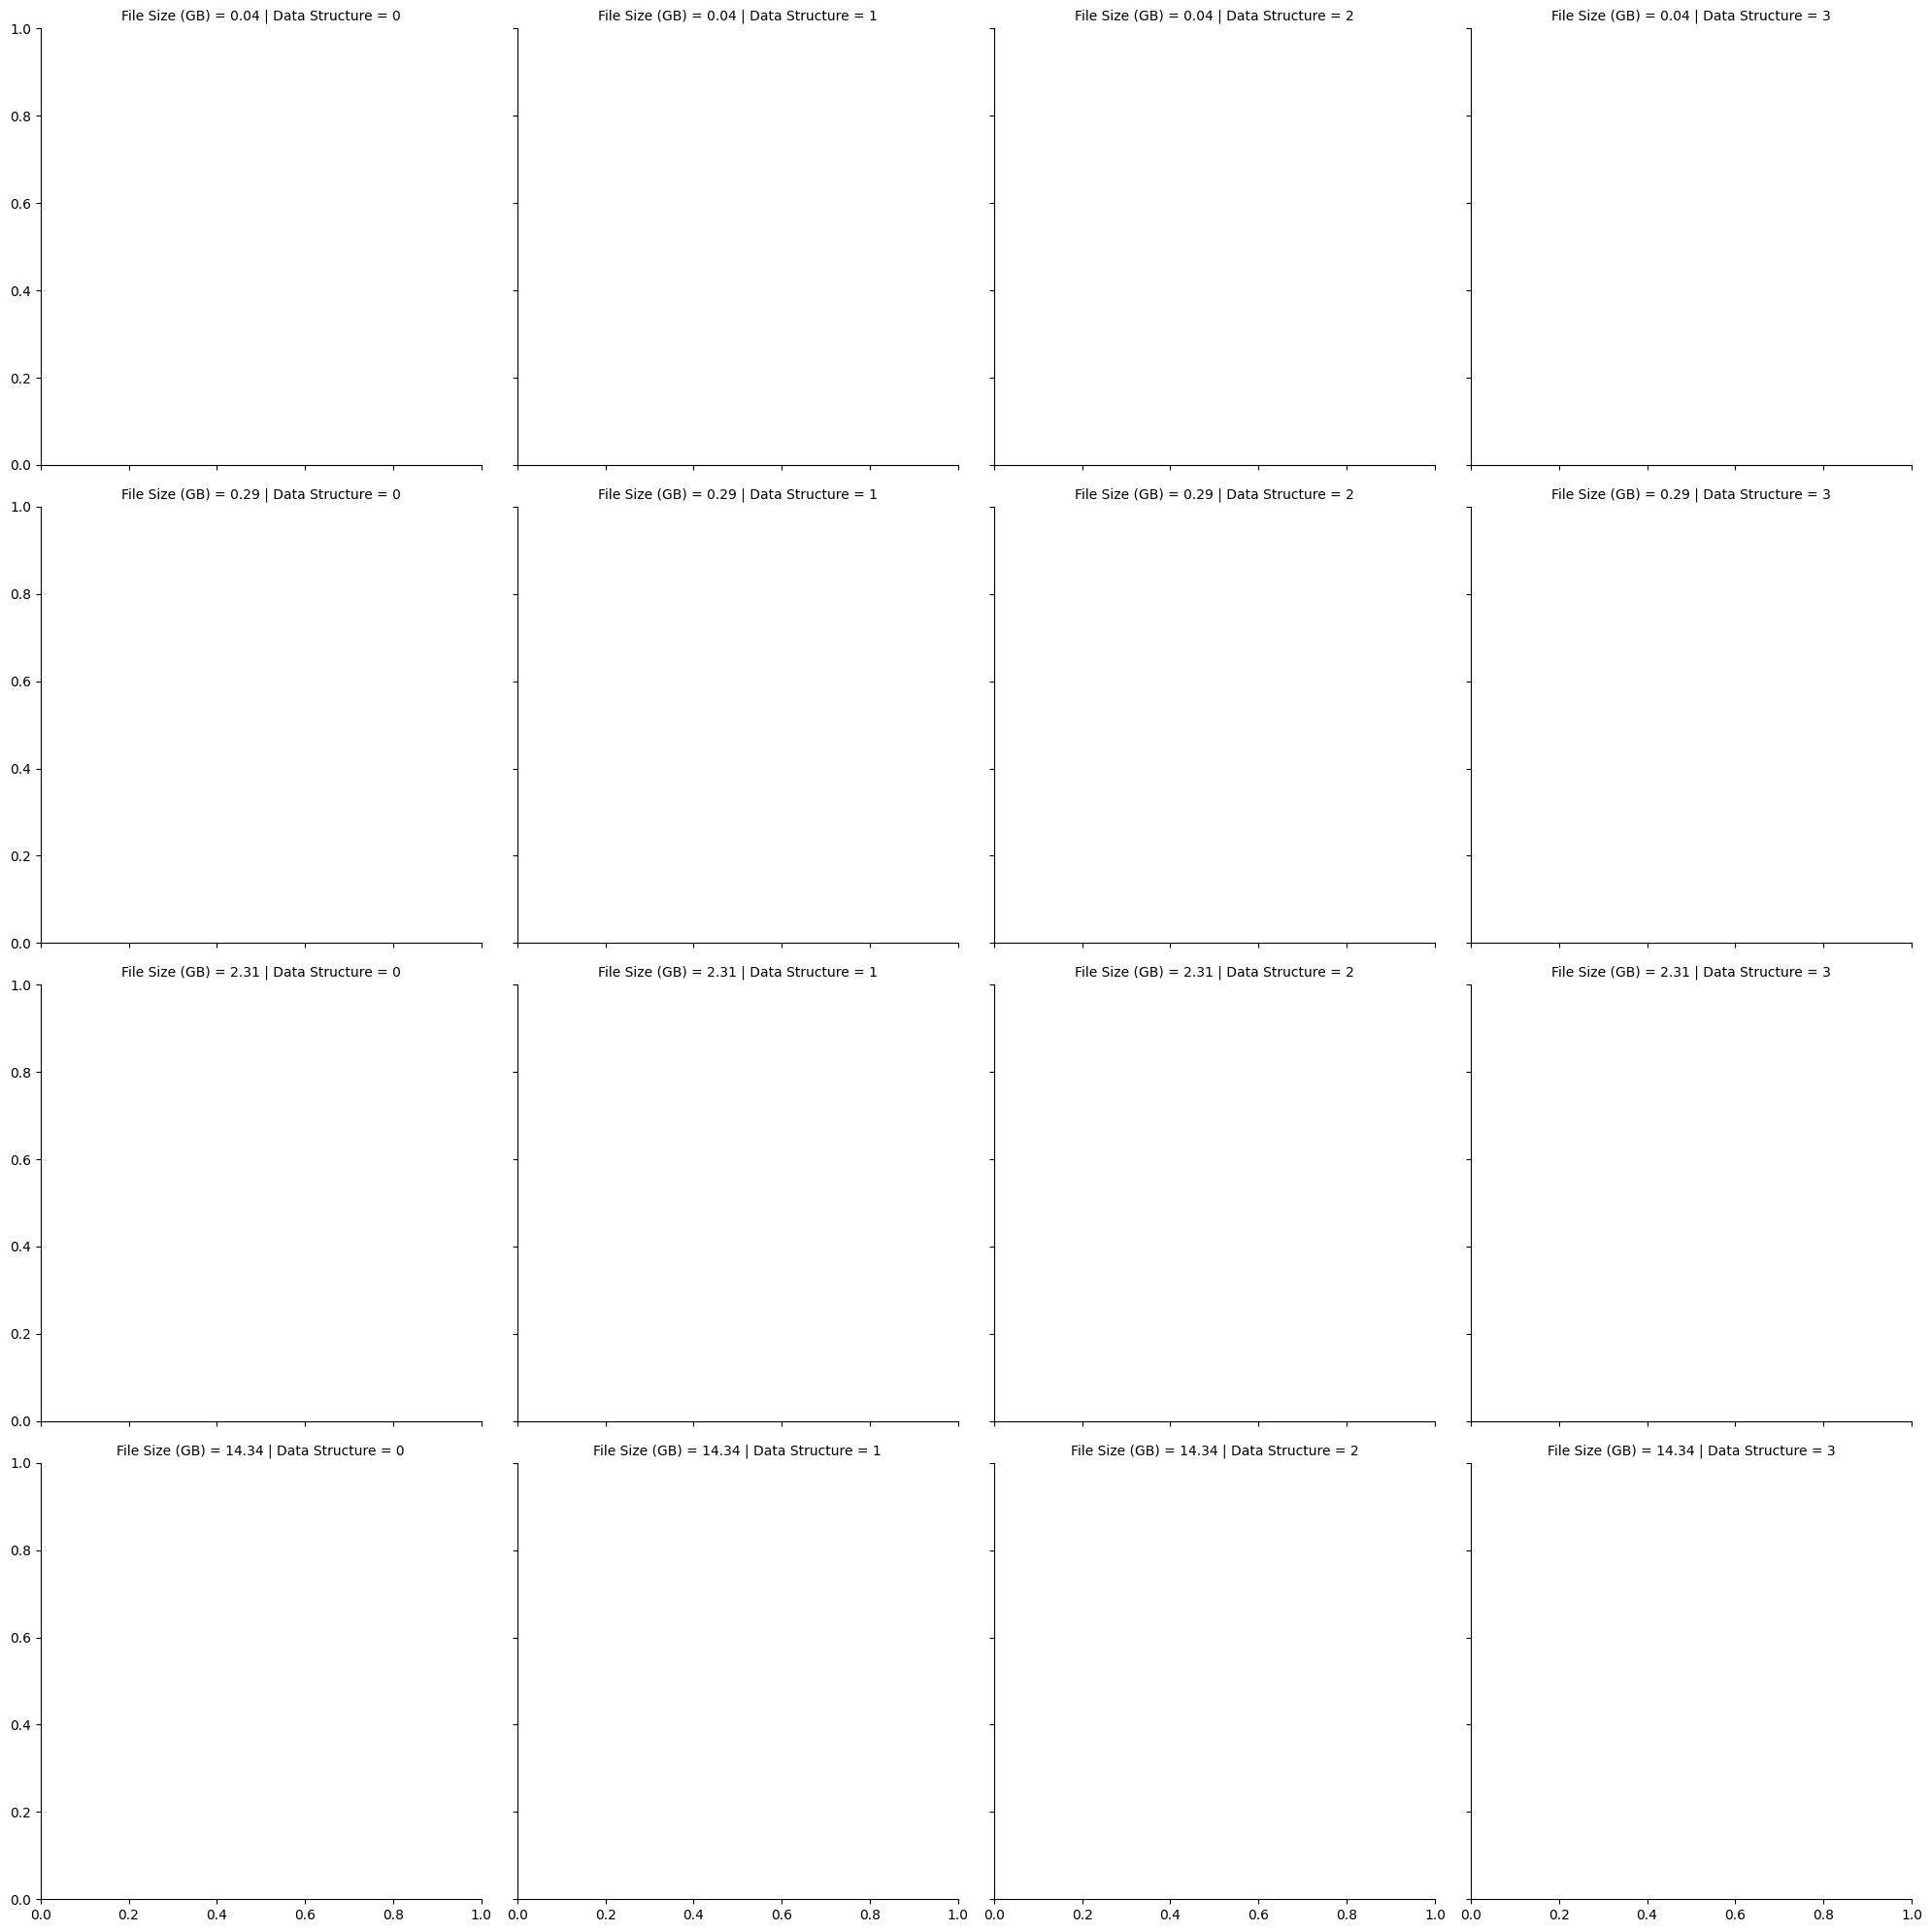

In [25]:

# 5. plot how Running time, Memory usage and CPU utilization change with Algorithm Approach, Data Structure, and Chunk Size
sns.relplot(x="Chunk Size (MB)", y="Memory usage (MB)", hue="Algorithm Approach",
            col="Data Structure", row="File Size (GB)", data=df, kind="line")

plt.show()

KeyError: 'x'

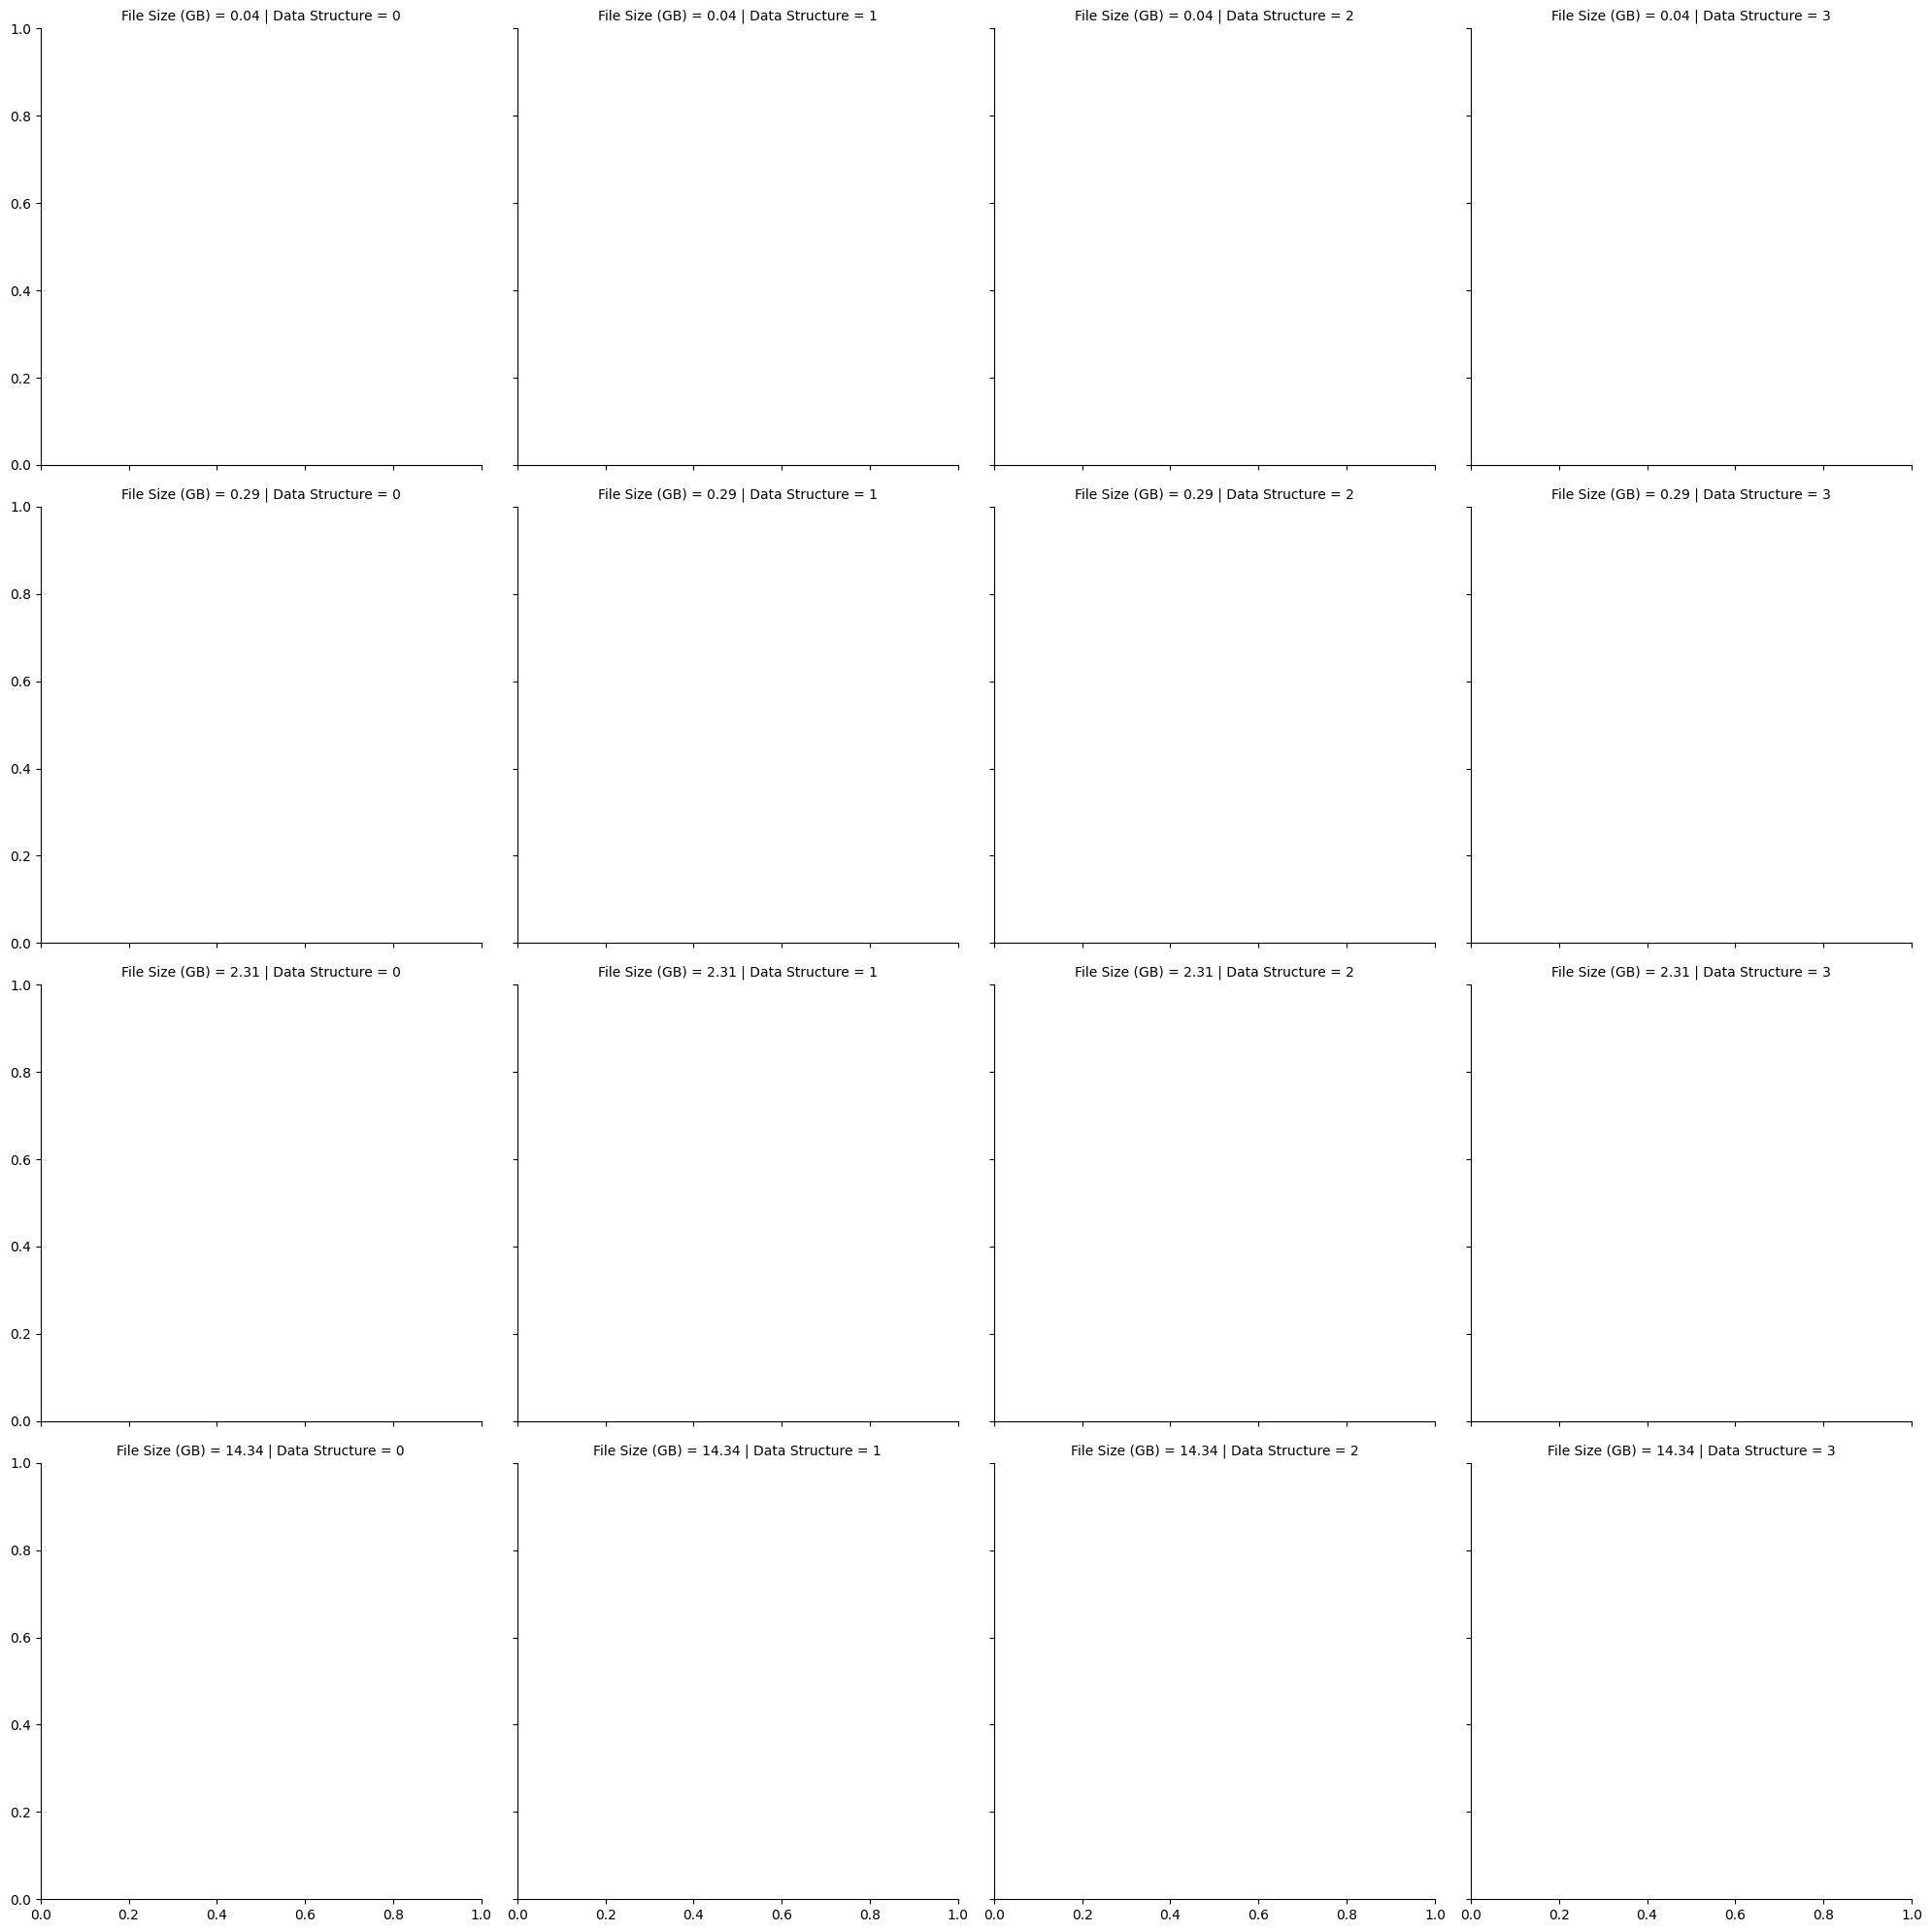

In [26]:

# 5. plot how Running time, Memory usage and CPU utilization change with Algorithm Approach, Data Structure, and Chunk Size
sns.relplot(x="Chunk Size (MB)", y="CPU utilization %", hue="Algorithm Approach",
            col="Data Structure", row="File Size (GB)", data=df, kind="line")

plt.show()